In [3]:
import pandas as pd
from io import StringIO

csv_data = """
A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,7.0,8.0
10.0,11.0,12.0,
"""
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0
2,10.0,11.0,12.0,NaN


In [4]:
df.isnull().sum()

A    0
B    0
C    0
D    1
dtype: int64

In [5]:
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0


In [6]:
df.dropna(axis=1)

,A,B,C
0,1.0,2.0,3.0
1,5.0,6.0,7.0
2,10.0,11.0,12.0


In [7]:
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0
2,10.0,11.0,12.0,NaN


In [8]:
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0


In [9]:
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0
2,10.0,11.0,12.0,NaN


In [10]:
from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [10., 11., 12.,  6.]])

In [11]:
from sklearn.preprocessing import FunctionTransformer

ftr_imr = FunctionTransformer(lambda X: imr.fit_transform(X.T).T)
imputed_data = ftr_imr.fit_transform(df.values)
imputed_data

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [10., 11., 12., 11.]])

In [12]:
imr = SimpleImputer(add_indicator=True)
imputed_data = imr.fit_transform(df.values)
imputed_data

array([[ 1.,  2.,  3.,  4.,  0.],
       [ 5.,  6.,  7.,  8.,  0.],
       [10., 11., 12.,  6.,  1.]])

In [13]:
imr.indicator_

MissingIndicator(error_on_new=False)

In [14]:
imr.indicator_.features_

array([3])

In [15]:
imr.indicator_.fit_transform(df.values)

array([[False],
       [False],
       [ True]])

In [16]:
imr.inverse_transform(imputed_data)

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [10., 11., 12., nan]])

In [17]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

iimr = IterativeImputer()
iimr.fit_transform(df.values)

array([[ 1.        ,  2.        ,  3.        ,  4.        ],
       [ 5.        ,  6.        ,  7.        ,  8.        ],
       [10.        , 11.        , 12.        , 12.99999825]])

In [18]:
from sklearn.impute import KNNImputer

kimr = KNNImputer()
kimr.fit_transform(df.values)

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [10., 11., 12.,  6.]])

In [19]:
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0
2,10.0,11.0,12.0,6.0


In [20]:
df.fillna(method='bfill')

/var/folders/3g/9z2y6vy916ncn7tzc7rkg8140000gn/T/ipykernel_63506/4194935721.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill')


,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0
2,10.0,11.0,12.0,NaN


In [21]:
df.fillna(method='ffill')

/var/folders/3g/9z2y6vy916ncn7tzc7rkg8140000gn/T/ipykernel_63506/253117906.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill')


,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0
2,10.0,11.0,12.0,8.0


In [22]:
df.fillna(method='ffill', axis=1)

/var/folders/3g/9z2y6vy916ncn7tzc7rkg8140000gn/T/ipykernel_63506/4240272785.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', axis=1)


,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0
2,10.0,11.0,12.0,12.0


In [23]:
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 15.3, 'class2']
])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [24]:
size_mapping = {'XL': 3, 'L': 2, 'M': 1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [25]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [26]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [27]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [28]:
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [29]:
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

In [30]:
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

In [31]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(dtype=int)
col_trans = ColumnTransformer([('ord_enc', ord_enc, ['color'])])
X_trans = col_trans.fit_transform(df)
X_trans

array([[1],
       [2],
       [0]])

In [33]:
col_trans.named_transformers_['ord_enc'].inverse_transform(X_trans)

array([['green'],
       ['red'],
       ['blue']], dtype=object)

In [34]:
from sklearn.preprocessing import OneHotEncoder

X = df[['color', 'size', 'price']].values
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [35]:
from sklearn.compose import ColumnTransformer

X = df[['color', 'size', 'price']].values
c_transf = ColumnTransformer([('onehot', OneHotEncoder(), [0]), ('nothing', 'passthrough', [1, 2])])
c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [36]:
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,False,True,False
1,13.5,2,False,False,True
2,15.3,3,True,False,False


In [37]:
pd.get_dummies(df[['price', 'color', 'size']], columns=['size'])

,price,color,size_1,size_2,size_3
0,10.1,green,True,False,False
1,13.5,red,False,True,False
2,15.3,blue,False,False,True


In [38]:
pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)

,price,size,color_green,color_red
0,10.1,1,True,False
1,13.5,2,False,True
2,15.3,3,False,False


In [39]:
color_ohe = OneHotEncoder(categories='auto', drop='first')
c_transf = ColumnTransformer([('onehot', color_ohe, [0]), ('nothing', 'passthrough', [1, 2])])
c_transf.fit_transform(X).astype(float)

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

In [40]:
df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [41]:
df['x > M'] = df['size'].apply(lambda x: 1 if x in {'L', 'XL'} else 0)
df['x > L'] = df['size'].apply(lambda x: 1 if x == 'XL' else 0)

del df['size']
df

,color,price,classlabel,x > M,x > L
0,green,10.1,class2,0,0
1,red,13.5,class1,1,0
2,blue,15.3,class2,1,1


In [42]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [43]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, random_state=0, stratify=y)

In [44]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [45]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [46]:
ex = np.array([0, 1, 2, 3, 4, 5])

print('standardized : ', (ex - ex.mean()) / ex.std())
print('normalized : ', (ex - ex.min()) / (ex.max() - ex.min()))

standardized :  [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalized :  [0.  0.2 0.4 0.6 0.8 1. ]


In [47]:
from sklearn.preprocessing import RobustScaler

rbs = RobustScaler()
X_train_robust = rbs.fit_transform(X_train)
X_test_robust = rbs.transform(X_test)

In [48]:
(ex - np.percentile(ex, 50)) / (np.percentile(ex, 75) - np.percentile(ex, 25))

array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ])

In [49]:
from sklearn.preprocessing import MaxAbsScaler

mas = MaxAbsScaler()
X_train_maxabs = mas.fit_transform(X_train)
X_test_maxabs = mas.transform(X_test)

In [50]:
ex / np.max(np.abs(ex))

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [51]:
from sklearn.preprocessing import scale, minmax_scale, robust_scale, maxabs_scale

print('StandardScaler : ', scale(ex))
print('MinMaxScaler : ', minmax_scale(ex))
print('RobustScaler : ', robust_scale(ex))
print('MaxAbsScaler : ', maxabs_scale(ex))

StandardScaler :  [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
MinMaxScaler :  [0.  0.2 0.4 0.6 0.8 1. ]
RobustScaler :  [-1.  -0.6 -0.2  0.2  0.6  1. ]
MaxAbsScaler :  [0.  0.2 0.4 0.6 0.8 1. ]


In [52]:
from scipy import sparse

X_train_sparse = sparse.csr_matrix(X_train)
X_train_maxabs = mas.fit_transform(X_train_sparse)

In [53]:
X_train_robust = rbs.transform(X_train_sparse)

In [54]:
from sklearn.preprocessing import Normalizer

nrm = Normalizer()
X_train_l2 = nrm.fit_transform(X_train)

In [55]:
ex_2f = np.vstack((ex[1:], ex[1:] ** 2))
ex_2f

array([[ 1,  2,  3,  4,  5],
       [ 1,  4,  9, 16, 25]])

In [56]:
l2_norm = np.sqrt(np.sum(ex_2f ** 2, axis=1))
print(l2_norm)
ex_2f / l2_norm.reshape(-1, 1)

[ 7.41619849 31.28897569]


array([[0.13483997, 0.26967994, 0.40451992, 0.53935989, 0.67419986],
       [0.03196014, 0.12784055, 0.28764125, 0.51136222, 0.79900347]])

In [57]:
l1_norm = np.sum(np.abs(ex_2f), axis=1)
print(l1_norm)
ex_2f / l1_norm.reshape(-1, 1)

[15 55]


array([[0.06666667, 0.13333333, 0.2       , 0.26666667, 0.33333333],
       [0.01818182, 0.07272727, 0.16363636, 0.29090909, 0.45454545]])

In [58]:
max_norm = np.max(np.abs(ex_2f), axis=1)
print(max_norm)
ex_2f / max_norm.reshape(-1, 1)

[ 5 25]


array([[0.2 , 0.4 , 0.6 , 0.8 , 1.  ],
       [0.04, 0.16, 0.36, 0.64, 1.  ]])

In [59]:
from sklearn.linear_model import LogisticRegression

LogisticRegression(penalty='l1')

LogisticRegression(penalty='l1')

In [60]:
lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)
print('훈련 정확도 : ', lr.score(X_train_std, y_train))
print('테스트 정확도 : ', lr.score(X_test_std, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  1.0


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [61]:
lr.intercept_

array([-1.26384937, -1.21579552, -2.3702405 ])

In [62]:
lr.coef_[lr.coef_ != 0].shape

(23,)

In [63]:
lr.coef_

array([[ 1.2455171 ,  0.1806634 ,  0.74587602, -1.16337379,  0.        ,
         0.        ,  1.15888935,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55769317,  2.50880058],
       [-1.53801728, -0.38690719, -0.99490926,  0.36448653, -0.05954917,
         0.        ,  0.66711192,  0.        ,  0.        , -1.93328778,
         1.23564686,  0.        , -2.23131479],
       [ 0.13583815,  0.16838269,  0.35722201,  0.        ,  0.        ,
         0.        , -2.43799029,  0.        ,  0.        ,  1.56374801,
        -0.8187123 , -0.49237782,  0.        ]])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_

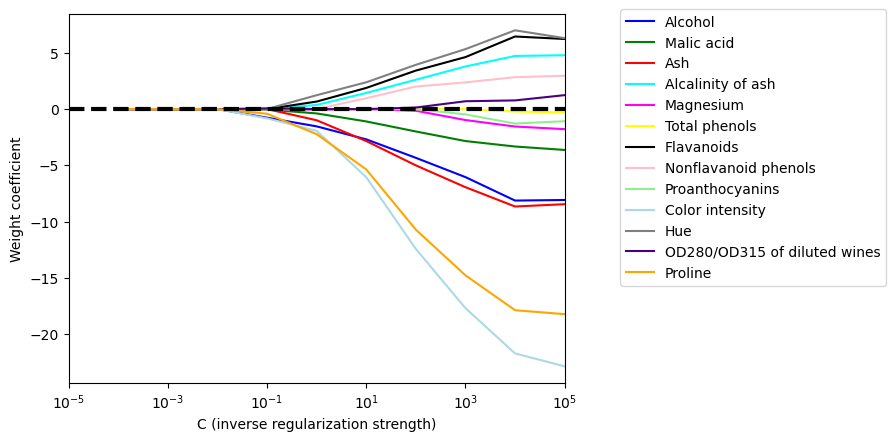

In [64]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan',
          'magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue',
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10. ** c, solver='liblinear', multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10 ** c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1], color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10 ** (-5), 10 ** 5])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

In [65]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS:
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size,
                                                            random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

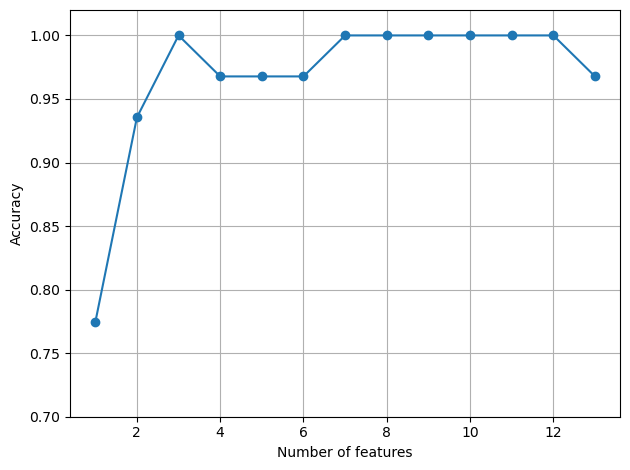

In [66]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [67]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [68]:
knn.fit(X_train_std, y_train)
print('훈련 정확도 : ', knn.score(X_train_std, y_train))
print('테스트 정확도 : ', knn.score(X_test_std, y_test))

훈련 정확도 :  0.967741935483871
테스트 정확도 :  0.9629629629629629


In [69]:
knn.fit(X_train_std[:, k3], y_train)
print('훈련 정확도 : ', knn.score(X_train_std[:, k3], y_train))
print('테스트 정확도 : ', knn.score(X_test_std[:, k3], y_test))

훈련 정확도 :  0.9516129032258065
테스트 정확도 :  0.9259259259259259


 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


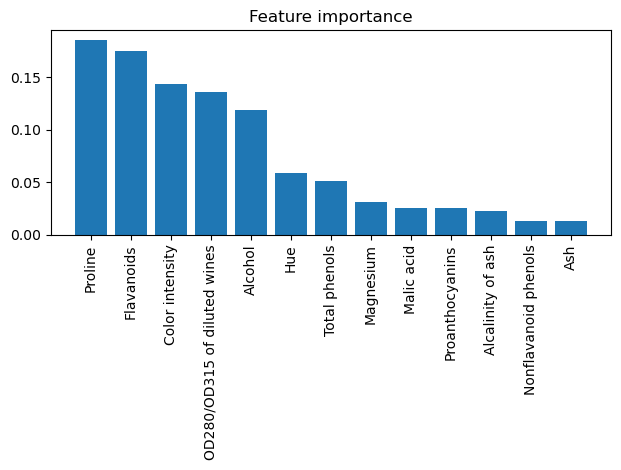

In [70]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500, random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')

plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [71]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('이 임계 조건을 만족하는 샘플의 수 : ', X_selected.shape[1])

이 임계 조건을 만족하는 샘플의 수 :  5


In [72]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529


In [73]:
from sklearn.feature_selection import RFE

rfe = RFE(forest, n_features_to_select=5)
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(n_estimators=500, random_state=1),
    n_features_to_select=5)

In [74]:
rfe.ranking_

array([1, 5, 9, 6, 4, 3, 1, 8, 7, 1, 2, 1, 1])

In [75]:
f_mask = rfe.support_

In [76]:
importances = rfe.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

In [77]:
for i in range(5):
    print("%2d) %-*s %f" % (i + 1, 30,
                            feat_labels[f_mask][indices[i]],
                            importances[indices[i]]))

 1) Proline                        0.261512
 2) Color intensity                0.216477
 3) Flavanoids                     0.212259
 4) OD280/OD315 of diluted wines   0.188924
 5) Alcohol                        0.120828
